# I Learning algorithm

## Topics

Part 1 (45 min):<br>
<code>**1: Gradient descent overview**</code><br>
<code>**2: Online, Batch, Minibatch mode**</code><br>
<code>**3: Relashion between perceptron and linear regression**</code><br>
<code>**4: An iterative training algorithm for linear regression**</code><br>

Part 2 (60 min):<br>
<code>**5: Calculus I: Derivative**</code><br>
<code>**6: Calculus II: Gradients**</code><br>
<code>**7: Understanding gradient descent**</code><br>

Part 3 (40 min):<br>
<code>**8 : Training an adaptive linear neuron(ADALINE)**</code><br>
<code>**9 : ADALINE code example**</code><br>
<code>**10: PyTorch API**</code>

We will go throuhg different learning modes: online, batch and minibatch. Thats a general concept that applies to all type of single layer networks and multilayer neural networks, basically everything in DL. Take some time to talka about relationship between perceptron and linear regression and then go to the interative training algorithm for linear regression. You probably know already the closed form soliution for linear regression, matrix formulations such the short condensed formula for solwing the weights and the bias unit directly. Here we will talk about an interative algoritmh because it will give us understanding how can we train NN. 

Concepts and calculus of gradient descent will be useful for fitting neurosn with this algorithm. We will primary focus on this algorithm and there will be some optional matter about caclulus topics to refresh or get familliar with 
[derivative](https://en.wikipedia.org/wiki/Derivative).

The goal is to improve upon perceptron and learn about neural network model for which the training always converges.<br>
<code>**This is probably the most fundamental lecture**</code>

### Goals overall

- A learning rule that is more robust thant the perceptron and always converges <code>**even if the data is not linearly separable**</code>

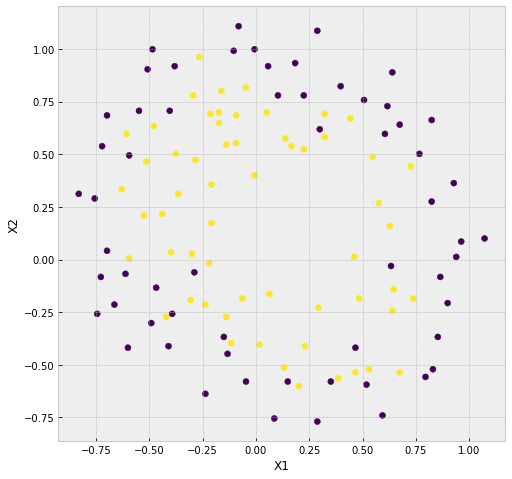

- Find a way to combine multiple neurons and layers of neurons to learn more complex decision boundaries because most real world problems are not linear problems

- Handle multiple categories not just binary classification

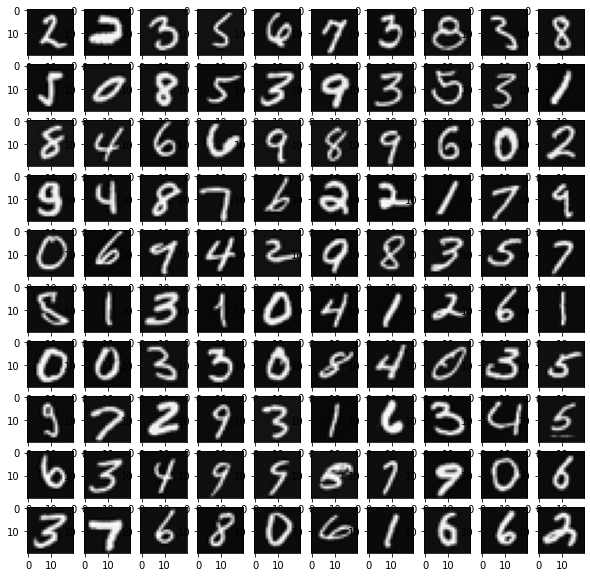

- Do fancy thinks like <code>**generating new images and text**</code>

And all of these types are based on the same learning algorithm and extensions of this learning algorithm. It is not like fundamentally different though. And this lecture we will learn the core principle of this algorithm that we will be use for the rest of the course.
<br>
<code>**Good news:**</code>
- After this lecture tere won't be any new mathematical concepts and more complicated things.
- Everything in DL will be an extensions and application of these basic concepts.

## Training NN in online, batch, minibatch modes

These modes refer essentially to how we utilize our data when we train a NN model. In which order we read the data regarding the training epochs and also how we update our model. These are general concepts that apply to any type of NN. <br>

<code>**Perceptron recap**</code>

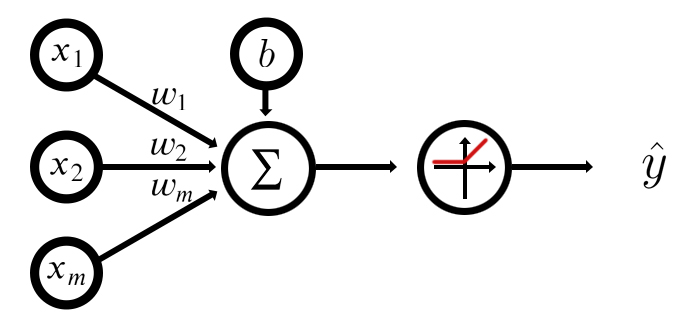

\begin{multline*}
\sigma(\sum^{m}_{i=1} x_{i}w_{i} + b) = \sigma(\mathbf{x}^{\top}\mathbf{w} +b ) = \hat{y}
\end{multline*}

\begin{multline*} 
\sigma(z) = 
\left\{\begin{matrix}
 0, & z \leq 0 \\ 
 1, & z > 0  
\end{matrix}\right.
\end{multline*}

\begin{multline*}
b = -\theta
\end{multline*}

\begin{multline*}
\mathbf{D} = (\langle x^{[1]},y^{[1]} \rangle, \langle x^{[2]},y^{[2]}\rangle, \ ... \ \langle x^{[n]},y^{[n]}\rangle,) \in (\mathbb{R}^{m} \times \{0,1\})^{n}
\end{multline*}

<code>**On-line mode**</code><br>
This applies to all common neuron models and deep NN architectures. It is also called <code>**Stochastic mode**</code>

1. Intialize parameters
\begin{multline*}
\mathbf{w} := 0 \in \mathbb{R}^{m}, \mathbf{b}:=0
\end{multline*}


2. For every training epoch:
    - For every ⟨𝑥[i],𝑦[i]⟩ ∈ 𝐃 :
        - a) <code>**compute prediction:**</code>
        
        \begin{multline*} \hat{y}^{[i]} = \sigma(\mathbf{x^{[i]}}^{\top} \mathbf{w} + b)\end{multline*}
        
        - b) <code>**calculate error:**</code> 
        
        \begin{multline*} \mathbf{\text{err}} := ({y}^{[i]} - \hat{y}^{[i]})\end{multline*}
       
        - c) <code>**update parameters:**</code> 
        
        \begin{multline*} \mathbf{w}:=  \mathbf{w} + \mathbf{\text{err}} \times \mathbf{x}^{[i]} \end{multline*}
         \begin{multline*} \mathbf{b}:=  \mathbf{b} + \mathbf{\text{err}} \end{multline*}

<code>**On-line mode II (alternative)**</code><br>
Here we do not iterate over epochs we just for give number of iterations we do the updates by picking random data point form the data set and then proceed with prediction, error and update. Due to its random namer some data points can be used multiple times and some not used att all in the same number of iterations. It is easier with this one to derive certain theoretical proofs but with the first version of on-line mode we get better result because we are guaranteed that each data point is used in the data set and used the same number of times.

1. Intialize parameters
\begin{multline*}
\mathbf{w} := 0 \in \mathbb{R}^{m}, \mathbf{b}:=0
\end{multline*}


2. For t iteration:
    - Pick random ⟨𝑥[i],𝑦[i]⟩ ∈ 𝐃 :
        - a) <code>**compute prediction:**</code>
        
        \begin{multline*} \hat{y}^{[i]} = \sigma(\mathbf{x^{[i]}}^{\top} \mathbf{w} + b)\end{multline*}
        
        - b) <code>**calculate error:**</code> 
        
        \begin{multline*} \mathbf{\text{err}} := ({y}^{[i]} - \hat{y}^{[i]})\end{multline*}
       
        - c) <code>**update parameters:**</code> 
        
        \begin{multline*} \mathbf{w}:=  \mathbf{w} + \mathbf{\text{err}} \times \mathbf{x}^{[i]} \end{multline*}
         \begin{multline*} \mathbf{b}:=  \mathbf{b} + \mathbf{\text{err}} \end{multline*}

<code>**Batch mode**</code> <br>
Update happens after each epoch. Durring training we go through entire dataset and update <code>**parameter placeholders**</code> and after that current iteration we update the parameteres with placeholders that has accumulated information. The online mode is one update at a time so it could is a bit noisier. Batch mode is more robust we collect information from the whole dataset before we do a update. Disadvantage it is slower there a fewer updates and each update takes longer we have to cycle through all dataset before doing an update but the update will be more <code>**accurate**</code>.  

1. Intialize parameters
\begin{multline*}
\mathbf{w} := 0 \in \mathbb{R}^{m}, \mathbf{b}:=0
\end{multline*}


2. For every training epoch:
   
   - a)<code>**Intiliaze a placeholders for parameters:**</code>
   
    \begin{multline*}\Delta \mathbf{w} :=0, \Delta \mathbf{b}:=0\end{multline*}
  
   - b) For every ⟨𝑥[i],𝑦[i]⟩ ∈ 𝐃 : 
   
       - a) compute prediction
       - b) calculate error 
       - c) update Δ𝐰,Δ𝐛 the placeholders for parameters 
       
   - c) Update parameters 𝐰,𝐛: 
   
   \begin{multline*}\mathbf{w}:= \mathbf{w} + \Delta\mathbf{w}\end{multline*}
   \begin{multline*}\mathbf{b}:= \mathbf{b} + \Delta\mathbf{b}\end{multline*}

<code>**minibatch mode**</code><br>
It is a mix between on-line and batch mode. Minibatch is a chunk, subset of a data set. The size ussually common ones are 32/64/128/256/521 is depends on the problem, the k size is like a hyperparameter that we have to try out. There research papers that claim that smaller batch size can accelerate learning because it is noisier and that helps making updates faster. So we have more iterations. Larger batch size makes better use of GPU, we will go through this on topic about <code>**batch normalization**</code>.

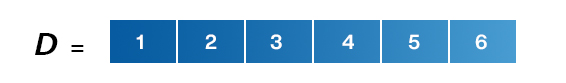

1. Intialize parameters
\begin{multline*}
\mathbf{w} := 0 \in \mathbb{R}^{m}, \mathbf{b}:=0
\end{multline*}

2. For every training epoch:
   
    3. For every <code>**minibatch of size k**</code>:
   
       - a) Intiliaze a placeholders for parameters:
   
        \begin{multline*}\Delta \mathbf{w} :=0, \Delta \mathbf{b}:=0\end{multline*}
  
       - b) For every {⟨𝑥[i],𝑦[i]⟩, ... ,⟨𝑥[i+k],𝑦[i+k]⟩ } ∈ 𝐃 : 
   
           - a) compute prediction
           - b) calculate error 
           - c) update Δ𝐰,Δ𝐛 the placeholders for parameters 
       
       - c) Update parameters 𝐰,𝐛: 
   
       \begin{multline*}\mathbf{w}:= \mathbf{w} + \Delta\mathbf{w}\end{multline*}
       \begin{multline*}\mathbf{b}:= \mathbf{b} + \Delta\mathbf{b}\end{multline*}

This technique is most commonly used in DL because:
 1. Choosing a subset vs 1 example at a time we can take advantage of vectorization (faster iteration through epoch than on-line);
 \begin{multline*} \mathbf{X}\mathbf{W}^{\top} \ \ vs.  \ \ \vec{x}\mathbf{w}^{\top}\end{multline*} 

 2. Having fewer updates than on-line makes updates less noisy;
 3. Makes more updates per epoch than "batch" and thus faster.

## The relation between perceptron and linear regression

We can think of linear regression as a single layer neural network. Knowing about linear regression will make things easier when we will go through gradient descent and also from there it is easy to go to the ADALINE (adaptive linear neuron). 

In <code>**Perceptron**</code> activation function is the threshold function that outputs a binary label

\begin{multline*}
\sigma(\sum^{m}_{i=1} x_{i}w_{i} + b) = \sigma(\mathbf{x}^{\top}\mathbf{w} +b ) = \hat{y}
\end{multline*}


\begin{multline*}
\hat{y} \in \{ 0,1 \}
\end{multline*}

In <code>**Linear regression**</code> activation function is the <code>**identity function**</code>

\begin{multline*}
\sigma(x) = x
\end{multline*}

The output is a real number

\begin{multline*}
\hat{y} \in \mathbb{R}
\end{multline*}

In linear regression we dont' have a threshold for 0 and 1 we return a continous value. So the activation is identity function. It doesn't do anything it just a pass through. <code>**In that way we can think of linear regresion as a linear neuron/ a single layer neural network!**</code>

In earlier classes about [computing parameters analyticaly](../../edu_machine_learning/__linear_regression/__V_Computing_parameters_analytically.ipynb) you probably have fitted a linear regression model  least squares like this using <code>**normal equation**</code> the so called analytical soliution:

\begin{multline*}
\mathbf{w} = (\mathbf{X}^{\top}\mathbf{X})^{-1} \mathbf{X}^{\top} y
\end{multline*}

<code>**assuming that the bias is included in 𝐰 and the desing matrix has an additional vector of 1's**</code>

 - Generally this is the best approach for linear regression although the matrix inversion might be problematic on large datasets
 - However we will now learn about another way to learn these parameter iteratively
 - We will do this in deep neural nets later where we have large datasetes, many connections and non-convex loss functions. For deep neural nets there is no close form no analytical soliution so we will use iterative way

## An iterative training algorithm for linear regression

A very nave way (brute force) to fit a linear regression model and any neural net is to star with initializing the parameters to 0's or small random values.<br>
Then for k rounds:
 - Choose another random set of weights
 - If the model performs better keep those weights
 - If the model performs worse discard the weights
 
 <code>**This approach is guaranteed to find the optimal soliution for very large k but it would be terribly inefficient and slow.**</code>




- We will analyze <code>**what effect a change of parameter has on the predictive performance (loss) of the model**</code> then we change the weight a little bit in the direction that improves the performance (minimizes the loss) the most.
- We do this in <code>**several small steps until**</code> the loss does not further decrease

In turns out that this is on-line mode that we talk about it. Its a bit similar to the <code>**perceptron learning rule**</code> but has slight modifications and is used for convex loss functions and also can be used for non-convex in NN<br>
<code>**Stochastic Gradient Descent**</code>:
<br>
<code>**Vectorized form**</code>
<br>
1. Intialize parameters
\begin{multline*}
\mathbf{w} := 0 \in \mathbb{R}^{m}, \mathbf{b}:=0
\end{multline*}

2. For every training epoch:
    - For every ⟨𝑥[i],𝑦[i]⟩ ∈ 𝐃 :
        - a) <code>**compute prediction:**</code>
        
        \begin{multline*} \hat{y}^{[i]} = \sigma(\mathbf{x^{[i]}}^{\top} \mathbf{w} + b)\end{multline*}
        
        - b) <code>**calculate error:**</code> 
        
        \begin{multline*} \nabla_{\mathbf{w}} \ \mathbf{L} = (y^{[i]} - \hat{y}^{[i]})\mathbf{x}^{[i]}\end{multline*}
        \begin{multline*} \nabla_{\mathbf{b}} \ \mathbf{L} = (y^{[i]} - \hat{y}^{[i]})\end{multline*}
           
        - c) <code>**update parameters:**</code> 
        
        \begin{multline*} \mathbf{w}:=  \mathbf{w} + \eta \times (-\nabla_{\mathbf{w}}\mathbf{L}) \end{multline*}
         \begin{multline*} \mathbf{b}:= \mathbf{b} + \eta \times (-\nabla_{\mathbf{b}}\mathbf{L}) \end{multline*}

<code>**Gradient**</code>

\begin{multline*}\nabla \end{multline*}

<code>**Gradient of Loss function with respect to weights**</code>

\begin{multline*}\nabla_{\mathbf{w} \mathbf{L}} \end{multline*}

<code>**Learning rate**</code>

\begin{multline*}\eta \end{multline*}


The way how we get this gradient is based on calculus and we will go trough this procedure. Firstly unrolling vectorized forms and getting to the partial derivatives

1. Intialize parameters
\begin{multline*}
\mathbf{w} := 0 \in \mathbb{R}^{m}, \mathbf{b}:=0
\end{multline*}

2. For every training epoch:
    - For every ⟨𝑥[i],𝑦[i]⟩ ∈ 𝐃 :
        - A) <code>**compute prediction:**</code>
        
        \begin{multline*} \hat{y}^{[i]} = \sigma(\mathbf{x^{[i]}}^{\top} \mathbf{w} + b)\end{multline*}
        
        - B) <code>**For weight 𝑗 in {1, ...𝑚}:**</code> 
            - (b) \begin{multline*} \dfrac{\partial L}{\partial w_{j}} = (y^{[i]} - \hat{y}^{[i]})\mathbf{x}^{[i]}_{j}\end{multline*}
            - (c) \begin{multline*} w_{j} := w_{j} + \eta \times (-\dfrac{\partial L}{\partial w_{j}})\end{multline*}
         
        - C) 
            \begin{multline*}\dfrac{\partial L}{\partial b} =  (y^{[i]} - \hat{y}^{[i]})\end{multline*}
            \begin{multline*} b:= b + \eta \times (-\dfrac{\partial L}{\partial b})\end{multline*}

This learning rule is called stochastic gradient descent. How did we get there  ? We need to cover relevant some background info about this.

## Derivatives

Brief summary for main parts that we will need for gradient descent algorithm.<br>
<code>**Differential calculus refresher**</code><br>
Derivative of a function you can think of it as the rate of change of that function or so called slope.


Here is a simple example a function `f(x) = 2x` so if we have an input x let say 3 then the output would be 2x = 6. Now lets pick a second point and move on the axis x by `Δ𝑎`. So we then arrive at next point further by 4 points thats 7 and the corresponding output would be 2*7= 14. Between these two points there is a change. On y axis its from 6 to 14 by 8 units and on x axis its from 3 to 7 so it is only 4 units. We can compute the rate of change of the slope by having this 8 divided by 4 that is equal 2. So the slope of this functions is 2. Below is the formal equation how can we compute this slope. 

\begin{multline*}
\dfrac{f(a + \Delta a) - f(a)}{a +\Delta a - a} = \dfrac{f(a + \Delta a) - f(a)}{\Delta a}
\end{multline*}

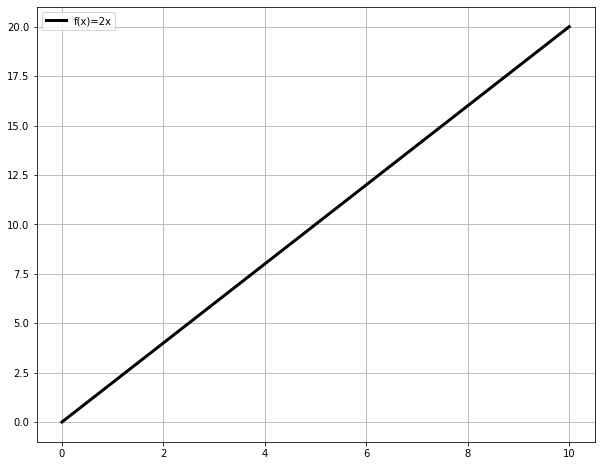

In [108]:
%run ../code_examples/visualize/x_derivative.py

### Function derivative

Above was a big leap on x axis usually when we think of function derivatives we think about very small change in the input. What happens if Δ𝑥 goes to 0 being infinitely small

This notation means the same but has different naming.<br>

<code>**Lagrange notation**</code>
\begin{multline*}
f’(x)
\end{multline*}

<code>**Leibniz notation**</code>
\begin{multline*}
\dfrac{df}{dx}
\end{multline*}

\begin{multline*}
f’(x) = \dfrac{df}{dx} = \lim_{\Delta x \rightarrow 0} \ \dfrac{f(x + \Delta x) - f(x)}{\Delta x}
\end{multline*}

\begin{multline*}
f(x) = 2x
\end{multline*}

\begin{multline*}
\dfrac{df}{dx} = \lim_{\Delta x \rightarrow 0} \dfrac{f(x + \Delta x) - f(x)} {\Delta x}
\end{multline*}

\begin{multline*}
= \lim_{\Delta x \rightarrow 0} \dfrac{2(x + \Delta x) - 2x} {\Delta x}
\end{multline*}

\begin{multline*}
= \lim_{\Delta x \rightarrow 0} \dfrac{2x \hspace-2.2ex\diagup  + 2\Delta x - 2x \hspace-2.2ex\diagup} {\Delta x}
\end{multline*}

\begin{multline*}
= \lim_{\Delta x \rightarrow 0} \dfrac{2 \Delta x \hspace-2.2ex\diagup} {\Delta x \hspace-2.2ex\diagup}
\end{multline*}

\begin{multline*}
= \lim_{\Delta x \rightarrow 0} 2.
\end{multline*}

### Numerical vs Analytical/Symbolical Derivatives


\begin{multline*}
f(x) = x^{2}
\end{multline*}

\begin{multline*}
\dfrac{df}{dx} = \lim_{\Delta x \rightarrow 0} \dfrac{f(x + \Delta x ) - f(x)}{\Delta x}
\end{multline*}

\begin{multline*}
= \lim_{\Delta x \rightarrow 0} \dfrac{x^{2} + 2x \Delta x + (\Delta x)^{2} - x^{2}}{\Delta x}
\end{multline*}

\begin{multline*}
= \lim_{\Delta x \rightarrow 0} \dfrac{2x \Delta x \hspace-2.2ex\diagup + (\Delta x)^{2 \ \ \ \hspace-2.2ex\diagup}}{\Delta x \hspace-2.2ex\diagup} \ | \ \Delta x
\end{multline*}

\begin{multline*}
= \lim_{\Delta x \rightarrow 0} 2x + \Delta x 
\end{multline*}

\begin{multline*}
= \lim_{\Delta x \rightarrow 0} 2x
\end{multline*}

Conceptually we obtained the derivative 

\begin{multline*}
\dfrac{df}{dx} = 2x
\end{multline*}

By approximating the slope (tangent) by a secant between two point (as before)

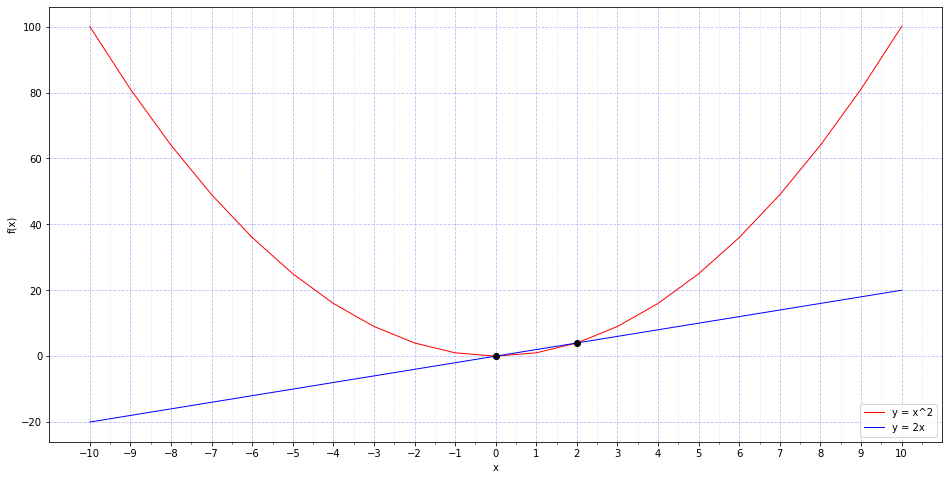

In [107]:
%run ../code_examples/visualize/x^2_derivative.py

$$ ax^{a-1}$$

### Cheatsheet

| | Function f(x) | Derivative with respect to x |
| :-| :- | :- |
1  |a       | 0            |
2  |x       | 1            |
3  |ax      | a            |
4  |x²      | 2x           |
5  |xᵃ      | axᵃ⁻¹        |
6  |aᵡ      | log(a)aᵡ     |
7  |log(x)  | 1/x          |
8  |logₐ(x) | 1/(x log(a)) |
9  |sin(x)  | cos(x)       |
10 |cos(x)  | -sin(x)      |
11 |tan(x)  | sec²(x)      |

| | Function | Derivative|
| :-| :- | :- |
Sum rule        |f(x) + g(x) | f′(x) + g′(x)                    |
Difference rule |f(x) - g(x) | f′(x) - g′(x)                    | 
Product rule    |f(x)g(x)    | f′(x)g(x) + f(x)g′(x)            |
Quotient rule   |f(x)/g(x)   | [g(x)f′(x) - f(x)g′(x)]/[g(x)]x² |
Reciprocal rule |1/f(x)      | [f′(x)]/[f(x)]²                  |
Chain rule      |f(g(x))     | f′(g(x))g′(x)                    |


Chain rule is kind of the main that drives deep learning. When will go through gradient descent it is essentially an application of chain rule when we compute the derivative of the loss function with respect to weights.

###  Chain rule and computation graph intuition

<code>**Decomposition of some nested functions:**</code>

\begin{multline*}
f(x) = f ( g(x) ) = z
\end{multline*}

PyTorch can do that automatically for us. It literally keeps a computation graph in the background.

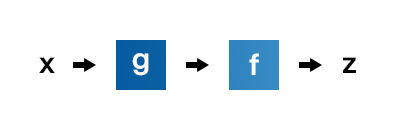

<code>**Derivative of that nested function:**</code>

\begin{multline*}
f'(x) = f' ( g(x) ) g'(x) = z'
\end{multline*}

PyTorch `autograd` packaged can compute the derivatives of most <code>**differentiable**</code> functions automatically but that doens't mean that we don't have to know how they work and how these are derived.

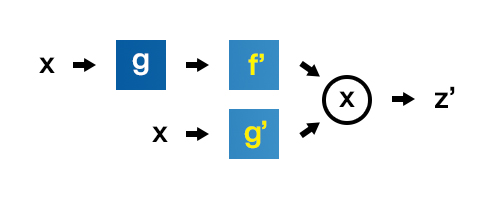

For efficiency we will mostly use the <code>**Leibniz**</code> notation:

\begin{multline*}
\dfrac{d}{dx} [f(g(x))] = \dfrac{df}{dg} \cdot \dfrac{dg}{dx}
\end{multline*}

### Chain rule example

\begin{multline*}
f(x) = log(\sqrt{x})
\end{multline*}

\begin{multline*}
\dfrac{df}{dx} = \dfrac{d}{dg} log(g) \cdot \dfrac{d}{dx} \sqrt{x}
\end{multline*}

<code>**with**</code>

\begin{multline*}
\dfrac{d}{dg}log(g) = \dfrac{1}{dg} = \dfrac{1}{\sqrt{x}}
\end{multline*}

<code>**and**</code>

\begin{multline*}
\dfrac{d}{dx}x^{1/2} = \dfrac{1}{2}x^{-1/2} = \dfrac{1}{2\sqrt{x}}
\end{multline*}

<code>**lead us to**</code>

\begin{multline*}
\dfrac{df}{dx} = \dfrac{1}{\sqrt{x}} \cdot \dfrac{1}{2\sqrt{x}} = \dfrac{1}{2x}
\end{multline*}

### Chain rule for arbitrarily long function compositions

\begin{multline*}
f(x) = f( g ( h ( u ( v(x) ) ) ) )
\end{multline*}

\begin{multline*}
\dfrac{df}{dx} = \dfrac{d}{dx}f(x) = \dfrac{d}{dx}f(g(h(u(v(x))))) = \dfrac{df}{dg} \cdot \dfrac{dg}{dh} \cdot \dfrac{dh}{du} \cdot \dfrac{du}{dv} \cdot \dfrac{dv}{dx} 
\end{multline*}

## Gradients

<code>**Derivatives of multivariable functions**</code>. In some field the term multivariable and multivariate are used interchangeably but here we really mean multivariable because mutlivariate means multiple outpus which is not the case here -- similarly in most DL applications output one prediction value or one prediction value per training example

\begin{multline*}
f(x, y, z, ...)
\end{multline*}

\begin{multline*}
\nabla f = 
\begin{bmatrix}
\partial f / \partial x \\
\partial f / \partial y \\
\partial f / \partial z \\
. \\
. \\
.
\end{bmatrix}
\end{multline*}

For gradient we use the <code>**partial**</code> symbol to denote partial derivatives. Mre of a notational convention and the concept is the same as before when we were computing ordinary derivatives denoted as <code>**d**</code>

If we compute ∂𝑓/∂𝑥 we set 𝑦,𝑧 ... al of these as constant. We treat them as regular number nos as variables. When we have compute this current partial derivative then we focus on the second and then 𝑥,𝑧,... are constant. So we compute each derivative at a time. Rules are the same as for the full derivative so big difference is that we threat those other variables as constants. 

\begin{multline*}
f(x, y) = x^2y + y
\end{multline*}

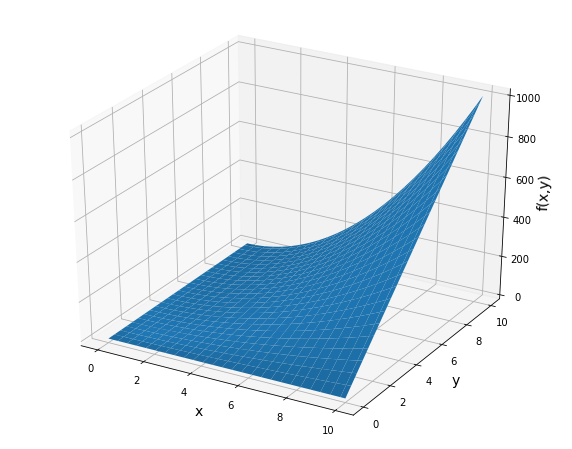

In [253]:
%run ../code_examples/visualize/x^2y+y.py

When we compute gradient of this function we

\begin{multline*}
\nabla f(x,y) =
\begin{bmatrix}
\partial f / \partial x \\
\partial f / \partial y
\end{bmatrix}
\end{multline*}

<code>**where (we threat y as a constant) and derivative of a constant (y) is 0**</code>

\begin{multline*}
x^{2}y +y = x^{2} \cdot 1 + 1 =  x^{2} \cdot 1 + 0
\end{multline*}

\begin{multline*}
\dfrac{\partial f}{\partial x} = \dfrac{\partial}{\partial x} x^{2}y +y = 2xy
\end{multline*}

<code>**via the power rule and constant rule and derivative of a variable is 1**</code>

\begin{multline*}
\dfrac{\partial f}{\partial y} = \dfrac{\partial}{\partial y} x^{2}y +y = x^{2} + 1
\end{multline*}

<code>**the gradient of the function 𝑓 is defined as**</code>

\begin{multline*}
\nabla f(x,y) =
\begin{bmatrix}
2xy\\
x^{2} + 1 y
\end{bmatrix}
\end{multline*}

_______________
Suppose we have a composite function like this and there is inner x that both input functions share:

\begin{multline*}
f(g(x), h(x))
\end{multline*}

Remember the regular chain rule for a single input, we compute the derivative of the outer part and then of the inner part:

\begin{multline*}
\dfrac{d}{dx}[f(g(x))] = \dfrac{df}{dg} \cdot \dfrac{dg}{dx}
\end{multline*}

For two input we now have common dependency on x so we will combine the results:

\begin{multline*}
\dfrac{d}{dx}[f(g(x), h(x))] = \dfrac{\partial f}{\partial g} \cdot \dfrac{dg}{dx} + \dfrac{\partial f}{\partial h} \cdot \dfrac{dh}{dx}
\end{multline*}

<code>**example**</code>

\begin{multline*}
f(g, h) = g^{2}h + h
\end{multline*}

<code>**focus on one at a time**</code>

\begin{multline*}
\dfrac{\partial f}{\partial g} \cdot \dfrac{dg}{dx} + \dfrac{\partial f}{\partial h} \cdot \dfrac{dh}{dx}
\end{multline*}

<code>**where 𝑔(𝑥) = 3𝑥, and ℎ(𝑥) = 𝑥²**</code>



\begin{multline*}
\dfrac{\partial f}{\partial g} = 2gh
\end{multline*}

\begin{multline*}
\dfrac{\partial f}{\partial h} = g^{2} +1
\end{multline*}

\begin{multline*}
\dfrac{dg}{dx} = \dfrac{d}{dx} 3x = 3
\end{multline*}

\begin{multline*}
\dfrac{dh}{dx} = \dfrac{d}{dx} x^{2} = 2x
\end{multline*}

\begin{multline*}
\dfrac{d}{dx} [f(g(x))] = [2gh \cot 3] + [(g^{2} +1 ) \cdot 2x] = 2xg^{2} + 6gh + 2x
\end{multline*}


### Gradients and the multivariable chain rule in vector form

Going a step further and write all this more compactly in a vector notation<code>**∇𝑓⋅𝑣′(𝑥).**</code>. It is the same function 𝑓(𝑔(𝑥),ℎ(𝑥)) with 2 input functions 𝑔,ℎ that in turn both take as input 𝑥. Gradient of 𝑓 - ∇𝑓 with respect to its inputs times the derivative 𝑣′ of a vector 𝑣.

\begin{multline*}
f(g(x), h(x))
\end{multline*}

\begin{multline*}
\dfrac{d}{dx}[f(g(x), h(x))] = \dfrac{\partial f}{\partial g} \cdot \dfrac{dg}{dx} + \dfrac{\partial f}{\partial h} \cdot \dfrac{dh}{dx}  = \nabla f \cdot v'(x).
\end{multline*}

<code>**where**</code>

\begin{multline*}
v(x) = 
\begin{bmatrix}
g(x) \\
h(x)
\end{bmatrix}
\end{multline*}

<code>**this is more compact more of writing those inner terms**</code>

\begin{multline*}
v'(x) = 
\dfrac{d}{dx}
\begin{bmatrix}
g(x) \\
h(x)
\end{bmatrix}
=
\begin{bmatrix}
dg/dx \\
dh/dx
\end{bmatrix}
\end{multline*}

<code>**putting it together**</code>

\begin{multline*}
\nabla f \cdot v'(x) = 
\begin{bmatrix}
\partial f / \partial g \\
\partial f / \partial h
\end{bmatrix}
\cdot
\begin{bmatrix}
dg/dx \\
dh/dx
\end{bmatrix}
= 
\dfrac{\partial f}{\partial g} \cdot \dfrac{dg}{dx} + \dfrac{\partial f}{\partial h} \cdot \dfrac{dh}{dx}
\end{multline*}

### The jacobian matrix

\begin{multline*}
f(x_{1},x_{2},...,x_{m}) = 
\begin{bmatrix}
f_{1}(x_{1},x_{2},x_{3},...,x_{m}) \\
f_{2}(x_{1},x_{2},x_{3},...,x_{m}) \\
f_{3}(x_{1},x_{2},x_{3},...,x_{m}) \\
... \\
f_{m}(x_{1},x_{2},x_{3},...,x_{m}) \\
\end{bmatrix}
\end{multline*}

Jaconian matrix is where all possible combinations is considered.

\begin{multline*}
J(x_{1},x_{2},...,x_{m}) = 
\begin{bmatrix}
\dfrac{\partial f_{1}}{\partial x_{1}} && 
\dfrac{\partial f_{1}}{\partial x_{2}} &&
\dfrac{\partial f_{1}}{\partial x_{3}} &&
... &&
\dfrac{\partial f_{1}}{\partial x_{m}} \\
\dfrac{\partial f_{2}}{\partial x_{1}} && 
\dfrac{\partial f_{2}}{\partial x_{2}} &&
\dfrac{\partial f_{2}}{\partial x_{3}} &&
... &&
\dfrac{\partial f_{2}}{\partial x_{m}} \\
\dfrac{\partial f_{3}}{\partial x_{1}} && 
\dfrac{\partial f_{3}}{\partial x_{2}} &&
\dfrac{\partial f_{3}}{\partial x_{3}} &&
... &&
\dfrac{\partial f_{3}}{\partial x_{m}}  \\
. && . && . && . && .  \\
\dfrac{\partial f_{m}}{\partial x_{1}} && 
\dfrac{\partial f_{m}}{\partial x_{2}} &&
\dfrac{\partial f_{m}}{\partial x_{3}} &&
... &&
\dfrac{\partial f_{m}}{\partial x_{m}}
\end{bmatrix}
\end{multline*}

each row of this jacobian matrix is gradient of function with respect to its inputs
\begin{multline*}
(\nabla f_{1})^{\top}
\end{multline*}

### Second order derivates
We won't need second order derivatives. They are not used in ML/DL field at the moment.

## Understanding gradient descent

Now with the familiarity what a function derivative or gradient is lets take a look at training a linear regression model using these concepts. We will use a technique called gradient descent which is related to computing function derivatives and gradients. Consider a linear regression model where the activation function is just the indentity function.

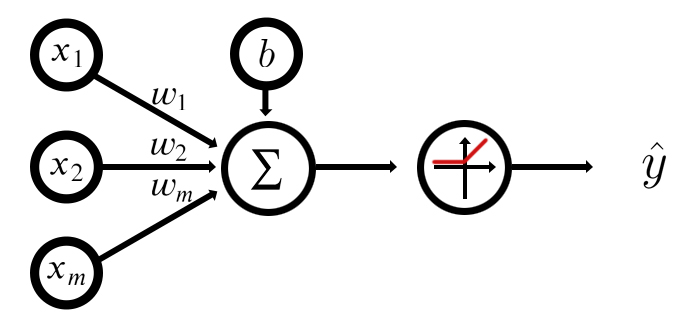

Convex loss function in the case of least squares linear regresion that is the sum squared error or means squeared error (MSE). Error is squared because the outliers will be more heaivily penalized. And also it doesnt matter if the true lable y and prediction 𝑦̂ is on the left or right.

\begin{multline*}
\mathcal{L}(\mathbf{w}, b) = \sum^{n}_{i=1}(\hat{y}^{[i]} - y^{[i]})^2
\end{multline*}

I have plotted the loss as a function of one of the weights. Notice there are ussually multiple weights here we are looking at only on weight because it simpler. But we will generelize this concept to multiple dimensions. We see this bowl or parobala shape and the loss is minimum for a certain value of the weights that is called <code>**global minimum**</code> that we want to find for the weights so that our prediction error or loss will be minimized. We will do this for all the weights if you would think of this in 3D this function would louk like a bowl where we want to reach the bottom of it.

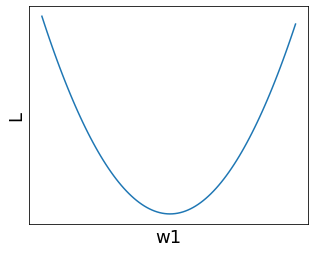

In [125]:
%run ../code_examples/visualize/simple_loss_function_graph.py

$$ \eta $$

### Gradient descent 

We have to start with a certain weight, starting point. We ussualy with linear regression initialize all weights to 0 or small random values. So if you have went thourhg derivatives section this looks almost like the U squared function that we went through, x². We can compute derivative of this function with respect to 𝑤1. If we consider starting weigt we currentyl start with some small random number we can computer the derivative at this point. The derivative will point <code>**upwards**</code> but we will use negative error slope. We can use this function gradient to guide the weights into the direction of the global minumum. The slope would tels us how steep is the function at a given point, but we are intereted in the negative slope which is also giving us the steepness of the function but instead of pointing upwards it points downwards towards minimum that we want to reach. Then we can use this value this negative slope or negative gradient to have guidance toward minimum one step at a time. To recap we had a <code>**learning rate 𝜂**</code>. And this rate together with the value of how steep it is guides how much we update. The closer we get to the minimu the smaller steps we make. Learnin rate scales these slopes by a constant. 

<code>**The right value of learning rate is a subject of optimization because if the value is to large we will always overshoot and never converge, if the value is to small convergance will be very slow.**</code>

In practive for a loss function convex like this is easy to reach minimum because everything is convex. <code>**But for the DL it complicated, there we have loss function that are non convex.**</code> And there are a lot of chalanges that modify gradient descent like GD with momentum overcomes , we will talk about these later.

<code>**Stochastic Gradient Descent**</code>:
<br>
<code>**Vectorized form**</code>
<br>
1. Intialize parameters
\begin{multline*}
\mathbf{w} := 0 \in \mathbb{R}^{m}, \mathbf{b}:=0
\end{multline*}

2. For every training epoch:
    - For every ⟨𝑥[i],𝑦[i]⟩ ∈ 𝐃 :
        - a) <code>**compute prediction:**</code>
        
        \begin{multline*} \hat{y}^{[i]} = \sigma(\mathbf{x^{[i]}}^{\top} \mathbf{w} + b)\end{multline*}
        
        - b) <code>**calculate error:**</code> 
        
        \begin{multline*} \nabla_{\mathbf{w}} \ \mathbf{L} = (y^{[i]} - \hat{y}^{[i]})\mathbf{x}^{[i]}\end{multline*}
        \begin{multline*} \nabla_{\mathbf{b}} \ \mathbf{L} = (y^{[i]} - \hat{y}^{[i]})\end{multline*}
           
        - c) <code>**update parameters:**</code> 
        
        \begin{multline*} \mathbf{w}:=  \mathbf{w} + \eta \times (-\nabla_{\mathbf{w}}\mathbf{L}) \end{multline*}
         \begin{multline*} \mathbf{b}:= \mathbf{b} + \eta \times (-\nabla_{\mathbf{b}}\mathbf{L}) \end{multline*}

learning rate
\begin{multline*}
\mathbf{\eta}
\end{multline*}

negative gradient
\begin{multline*}
\mathbf{-\nabla_{\mathbf{w}} L}, \mathbf{-\nabla_{\mathbf{b}} L}
\end{multline*}

These value are derived from our loss function with respect to w and b.

<code>**Mean squared Error (MSE) loss**</code>
\begin{multline*}
\mathcal{L}(\mathbf{w},b) = \dfrac{1}{2n}\sum^{n}_{i=1} (\hat{y}^{[i]} - y^{[i]})^{2}
\end{multline*}

\begin{multline*}
\nabla_{\mathbf{w}} \mathcal{L}
= 
\begin{bmatrix}
\partial \mathcal{L}/w_{1} \\
\partial \mathcal{L}/w_{2} \\
... 
\end{bmatrix}
\end{multline*}

Will take a look at one let say the first.

\begin{multline*}
\dfrac{\partial \mathcal{L}}{\partial w_{j}} = \dfrac{\partial}{\partial w_{j}}\dfrac{1}{2n} \sum^{n}_{i=1}(\hat{y}^{[i]} - y^{[i]})^{2}
\end{multline*}

\begin{multline*}
= \dfrac{\partial}{\partial w_{j}} \sum^{n}_{i=1}\dfrac{1}{2n}(\sigma(\mathbf{w}^{\top}\mathbf{x}^{[i]}) - y^{[i]})^{2}
\end{multline*}

\begin{multline*}
= \sum^{n}_{i=1} \dfrac{1}{n}(\sigma(\mathbf{w}^{\top}\mathbf{x}^{[i]} - y^{[i]}) \dfrac{\partial}{\partial w_{j}}(\sigma(\mathbf{w}^{\top}\mathbf{x}^{[i]}) - y^{[i]})
\end{multline*}

\begin{multline*}
= \dfrac{1}{n}\sum^{n}_{i=1}(\sigma(\mathbf{w}^{\top}\mathbf{x}^{[i]} - y^{[i]}) \dfrac{d\sigma}{d(\mathbf{w}^{\top}\mathbf{x}^{[i]})} \ \dfrac{\partial}{\partial w_{j}} \mathbf{w}^{\top}\mathbf{x}^{[i]}
\end{multline*}

\begin{multline*}
= \dfrac{1}{n}\sum^{n}_{i=1} (\sigma(\mathbf{w}^{\top}\mathbf{x}^{[i]} - y^{[i]}) \dfrac{d\sigma}{d(\mathbf{w}^{\top}\mathbf{x}^{[i]})} \ x^{[i]}_{j}
\end{multline*}

<code>**NOTE: activation function is the identity function in linear regression**</code>

\begin{multline*}
= \dfrac{1}{n}\sum^{n}_{i=1} (\sigma(\mathbf{w}^{\top}\mathbf{x}^{[i]} - y^{[i]})x^{[i]}_{j}
\end{multline*}

\begin{multline*}
= \dfrac{1}{n}\sum^{n}_{i=1} (\hat{y}^{[i]} - y^{[i]})x^{[i]}_{j}
\end{multline*}

This is how it used in ML/DL practice because for updating the weights we can choose a learning rate that is independant of size of training set or the size of mini batches. Otherwise if i change my dataset or mini batch size i have to find the learning rate everytime from scratch again.

The update of weights after each round to minimize this loos function

\begin{multline*}
\mathbf{w}_{j} : = \mathbf{w}_{j} + \eta \cdot (-2(\hat{y}^{[i]} - y^{[i]})x^{[i]}_{j})
\end{multline*}

### Batch gradient descent as surface plot

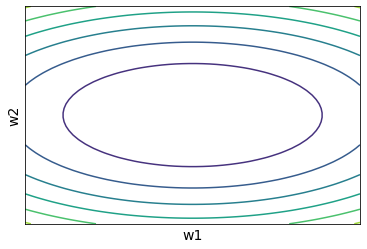

In [144]:
import matplotlib.pyplot as plt
import numpy as np

xlist = np.linspace(-10, 10)
ylist = ylist = np.linspace(-20, 20)
X, Y = np.meshgrid(xlist, ylist)

#creating elliptical plane
Z = (X**2)/4 + (Y**2)/6
fig, ax = plt.subplots()

#drawing contour plot
cb = ax.contour(X, Y, Z)
ax.set_xlabel('w1', fontsize=14)
ax.set_ylabel('w2', fontsize=14)
plt.xticks([])
plt.yticks([])
plt.show()

Stochastic updates are a bit noiser because each minibatch is an approximation of the overall loss on the training set. Later in deep neural nets we will see why noiser updates are actually helpfull

## Training an adaptive linear neuron (ADALINE)

<code>**Widrow and Hoff's ADALINE (1960)**</code> A nicely differentiable neuron model and it was a physical device.<br>

[LMS algorithm and ADALINE I, Stanford University (Prof. Bernard Widrow)](https://www.youtube.com/watch?v=hc2Zj55j1zU)

[LMS algorithm and ADALINE II, Stanford University (Prof. Bernard Widrow)](https://www.youtube.com/watch?v=skfNlwEbqck)

The <code>**Perceptron**</code> that we went through is not differentiable because of that threshold function, and ADALINE can be thought as a advancments of perceptron that is converging if the data is not linearly seperable. 

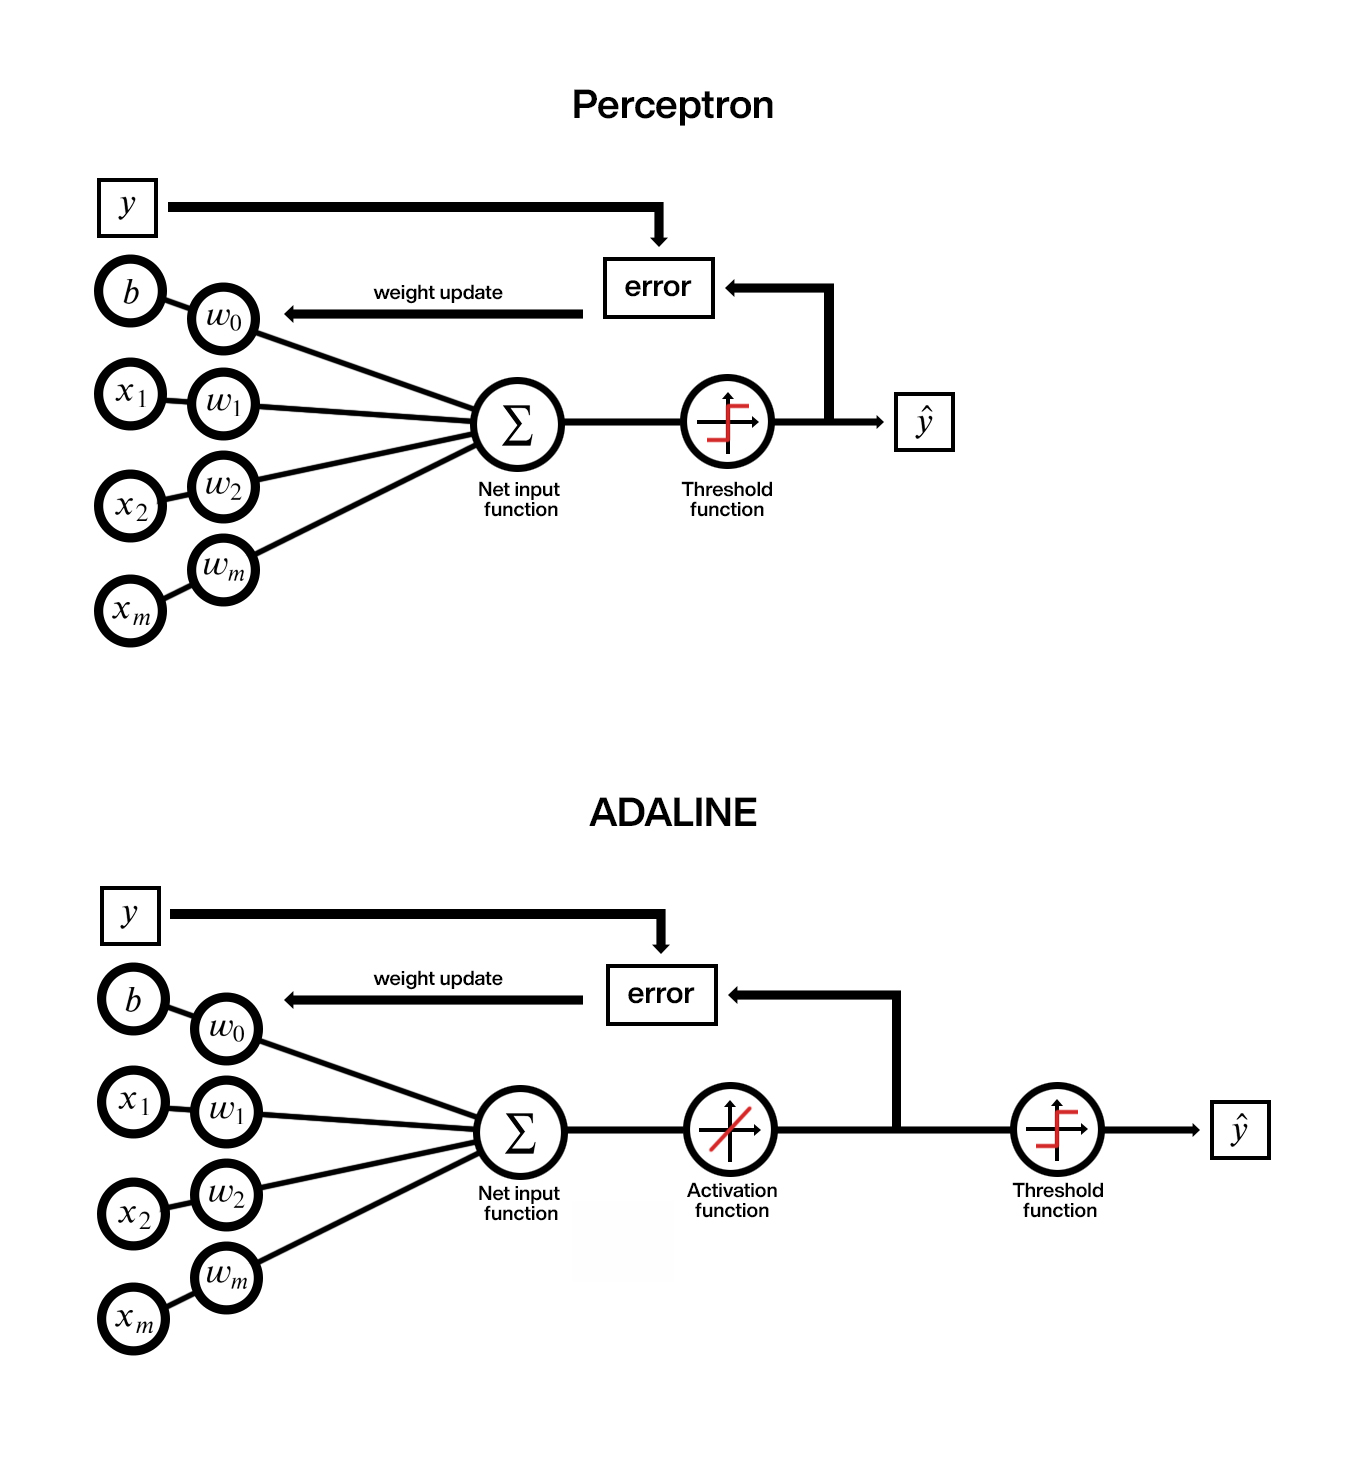

<code>**Perceptron**</code><br>
Just for comparison the structure of Perceptron , recall we compute the net input first and then we pass the net input to the threshold function and it produces the output predicted class label. And depending of the output value compared to the true label we calculate error if any and update weights that changes the prediction boundary to make the prediciton correct. But the threshold function <code>**is not differentiable**</code> here we could not use calculus there were just this learning rule that was developed by thinking hard about this problem, it is like empirical update rule.<br>

<code>**ADALINE**</code><br>
Now we can improve this by using calculus. It works like linear regression, we compute net input but now we have activation function (identity function f(x) = x) that is doing nothing. But if it is doing nothing why do we write it down but later on we will be talking about <code>**non linear activation functions**</code> like sigmoidal functions and other types. And we will need them to develop multlilayer neural networks. It will help our NN to produce non linear decision boundaries for solving complex problems. If we would be using linear activation functions in a multilayered neural network then the this network would be just a combination of a linear functions and the sum of linear functons is just a linear function so we would not gain anything. So in the ADALINE model think of it as just a placeholder. So considering this linear regression base in order to turn this model into ADALINE model all we have to do is add a threshold function. ADALINE model is a classifier similar to the perceptron. The difference as well is the point where we compute the error. For the perceptron it is computed after the treshold function and in ADALINE before. Here we dont have the problem that things are not differentiable because we compute it before the threshold function. Threshold function is still not differentiable but we dont worry about that because we compute the gradients before that. 

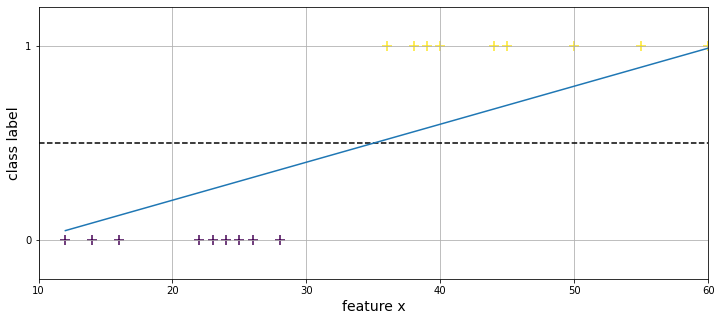

In [197]:
%run ../code_examples/visualize/linear_decision_boundary.py

Conceptually it looks like this when we fit an ADALINE model. We have two class labels on y axis for binary classification where we have two class labels 0 or 1. And we have 1 feature value for simplicity. And we want to predict that. Essentially what it will learn is line similar to linear regression except that in linear regression we have continous values not 0 and 1 and we don't have threshold function. So after fitting this model we apply this threshold function say at 0.5 between 0 and 1 and we say if prediction is greater than 0.5 produce class label 1 and otherwise 0. We turn continous prediction into a class label. 

## Linear regression with Gradient descent

Note that linear regression and ADALINE are very similar. The only difference is that we apply a threshold function for converting the ouptus from continous targets for predictions. The derivative and training procedure are indentical though. We can compare the twoo side by side.

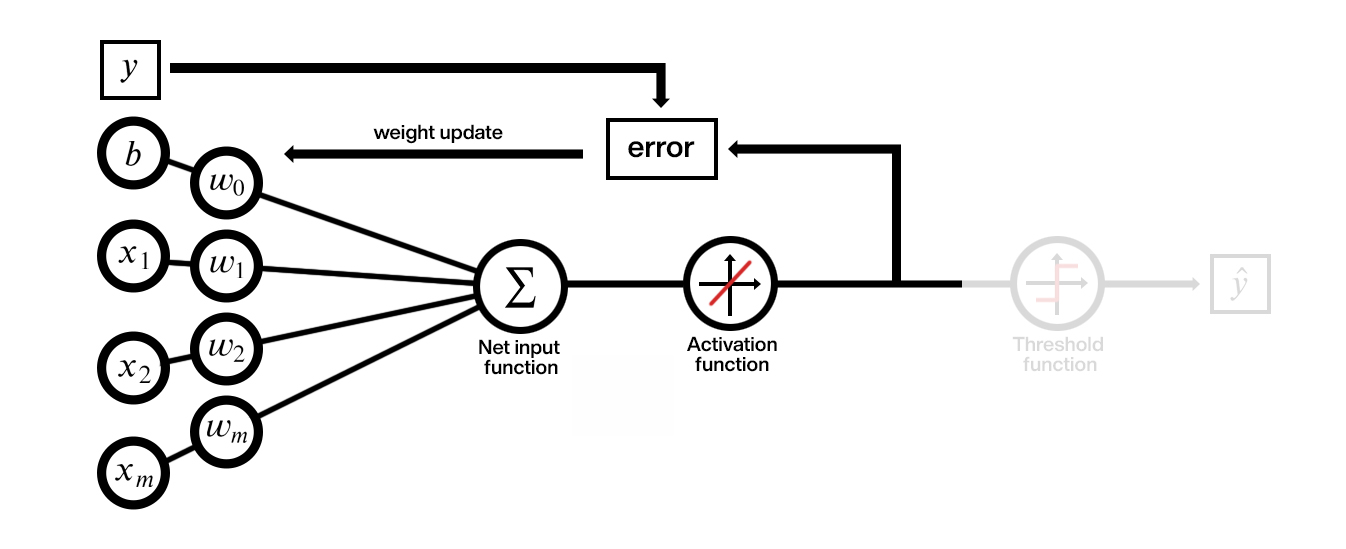

In [200]:
#import torch
import pandas as pd
import matplotlib.pyplot as plt

<code>**linear regression model**</code>

In [ ]:
%load ../code_examples/lin_reg_sample.py

<code>**ADALINE model**</code>

In [ ]:
%load ../code_examples/adaline_sample.py

In [211]:
df = pd.read_csv('../data_samples/linreg_toy_data.csv', index_col=0)

In [214]:
df.tail()

,x1,x2,y
995,-0.942094,-0.835856,-22.324428
996,1.222445,-0.403177,-52.121493
997,-0.112466,-1.688230,-57.043196
998,-0.403459,-0.412272,-27.701833
999,0.021351,-0.499017,-9.804714


In [ ]:
# Assign features and target

X = torch.tensor(df[['x1', 'x2']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.float)

In [ ]:
# Shuffle and split
def train_test_split(X, y, split_ratio=0.7):
    torch.manual_seed(123)
    shuffle_idx = torc.randperm(y.size(0), dtype=torch.long)

    X, y = X[shuffle_idx], y[shuffle_idx]

    slice_ = int(shuffle_idx.size(0) * split_ratio)

    X_train, X_test = X[shuffle_idx[:slice_]], X[shuffle_idx[slice_:]]
    y_train, y_test = y[shuffle_idx[:slice_]], y[shuffle_idx[slice_:]]
    
    return X_train, X_test, y_train, y_test

In [ ]:
# normalize (mean 0, unit variance)
def normalize(x):
    mu, sigma = x.mean(dim=0), x.std(dim=0)
    return  (x - mu) / sigma 

### Implement linear regression model

In [ ]:
class LinearRegression():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights      = torch.zeros(num_features, 1, dtype=torch.float)
        self.bias         = torch.ones(1, dtype=torch.float)
    
    def activation(self, x):
        # indetity function
        return x
    
    def forward(self, x):
        # net_inputs = x @ self.weights + self.bias
        net_inputs = torch.add(torch.mm(x, self.weights), self.bias)
        activations = self.activation(net_inputs)
        return activations.view(-1, 1)
    
    def backward(self, x , y_hat, y)
        # (y_hat - y)^2
        # derivative: 2*(y - y_hat)
        grad_loss_yhat    = 2 * (y - y_hat) 
        grad_yhat_weights = -x
        grad_yhat_bias    = -1.
        
        # chain rule: inner times outer
        grad_loss_weights = torch.mm(grad_yhat_weights.t(), grad_loss_yhat.view(-1,1)) / y.size[0]
        grad_loss_bias    = torch.sum(grad_yhat_bias * grad_loss_yhat) / y.size[0]
        
        # return negative gradient
        return (-1) * grad_loss_weights, (-1) * grad_loss_bias

### Define training and evaluation functions

In [ ]:
def loss(yhat, y):
    return torch.mean((yhat - y)**2)

# Batch gradient descent
def train(model, x, y, num_epochs, learning_rate=0.01):
    cost = []
    for e in range(num_epochs):
        # compute outputs
        yhat = model.forward(x)
        
        # compute negative gradients
        negative_grad_w, negative_grad_b = model.backward(x, yhat, y)
        
        # update weights
        model.weights += learning_rate * negative_grad_w
        model.bias    += learning_rate * negative_grad_w
        
        # logging
        yhat = model.forward(x)
        current_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % current_loss)
        cost.append(current_loss)
        
    return cost
        

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train = normalize(X_train)
X_test  = normalize(X_test)

In [ ]:
model = LinearRegression(num_features = X_train.size(1))
cost  = train(model, X_train, y_train, num_epocs=100, learning_rate=0.05)

### Evaluate linear regresson model

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show();

In [ ]:
train_pred = model.forward(X_train)
test_pred  = model.forward(X_test)

print('Train MSE: %.5f' % loss(train_pred, y_train))
print('Test  MSE: %.5f' % loss(test_pred, y_test))

### Compare with analytical soliution

In [ ]:
### Compare with analytical soliution
print('Weights', model.weights)
print('Bias', model.bias)

\begin{multline*}
\mathbf{w} = (\mathbf{X}^{\top} \mathbf{X})^{-1} \mathbf{X}^{\top}y
\end{multline*}

In [ ]:
def analytical_soliution(x, y):
    Xb = torch.cat((torch.ones((x.size(0), 1)), x),dim)
    w  = torch.zeros(x.size(1))
    z  = torch.inverse(torch.matmul(Xb.t(), Xb))
    params = torch.matmul(z, torch.matmul(Xb.t(), y))
    b, w = torch.tensor([params[0]]), params[1:].view(x.size(1), 1)
    return w, b

In [ ]:
w, b = analytical_soliution(X_train, y_train)
print('Analytical weights :', w)
print('Analytical bias: ', b)

<div class="alert alert-block alert-success">
<h2>Home work assignment</h2>

Modify the <code>**train**</code> function such that the dataset is shuffled prior to each epoch. Do you see a difference? Try to come up with an explanation for your observation

</div>

## ADALINE with Stochastic Gradient Descent (minibatch)

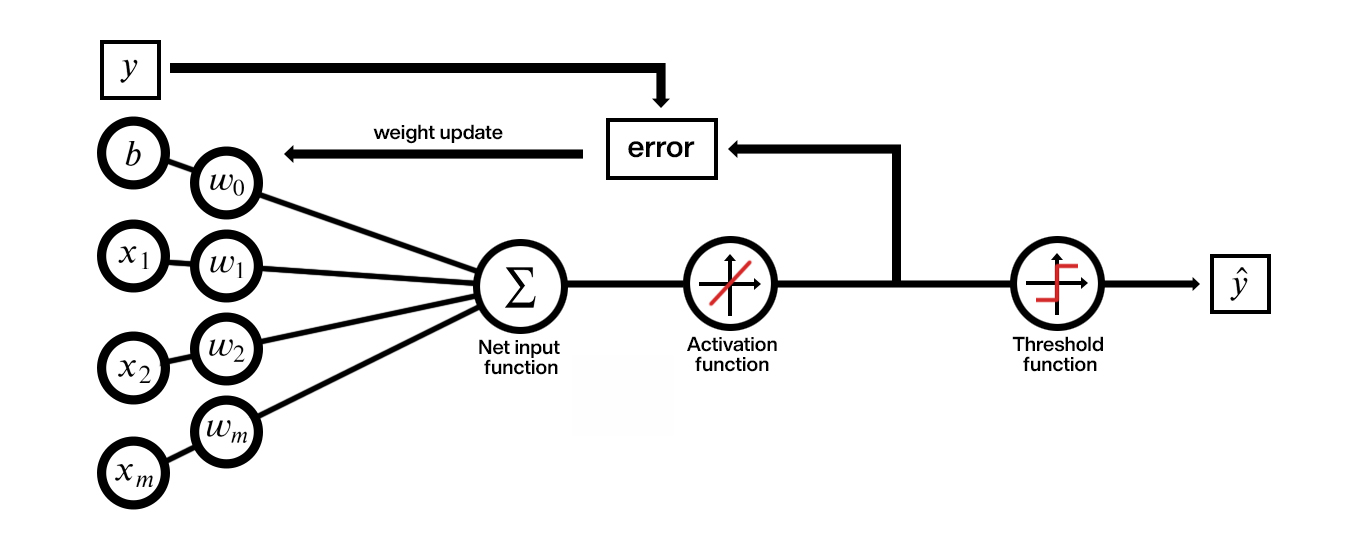

In [247]:
df = pd.read_csv('../data_samples/iris.data')

In [248]:
df.columns = ['x1', 'x2', 'x3', 'x4', 'y']

In [249]:
df

,x1,x2,x3,x4,y
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


Simplyfing data set to have only 2 class labels

In [250]:
df = df.loc[50:150, :]
df['y'] = df['y'].apply(lambda x: 0 if x == 'Iris-versicolor' else 1)
df.tail()

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,x1,x2,x3,x4,y
144,6.7,3.0,5.2,2.3,1
145,6.3,2.5,5.0,1.9,1
146,6.5,3.0,5.2,2.0,1
147,6.2,3.4,5.4,2.3,1
148,5.9,3.0,5.1,1.8,1


In [251]:
df.y.unique()

array([0, 1], dtype=int64)

In [ ]:
# Assign features and target

X = torch.tensor(df[['x2', 'x3']].values, dtype=torch.float)
y = torch.tensor(df['y'].values, dtype=torch.float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train = normalize(X_train)
X_test  = normalize(X_test)

In [ ]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label = 'class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label = 'class 0')
plt.legend()
plt.show();

In [ ]:
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], label = 'class 0')
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], label = 'class 0')
plt.legend()
plt.show();

### Implement ADALINE model

In [ ]:
class Adaline():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights      = torch.zeros(num_features, 1, dtype=torch.float) 
        self.bias         = torch.ones(1, dtype=torch.float)
        
    def activations(self x):
        return x
    
    def forward(self, x):
        net_inputs = torch.add(torch.mm(x, self.weights), self.bias)
        activations = self.activations(x)
        return activations.view(-1)
    
    def backward(self, x, y_hat, y):
        grad_loss_yhat    = 2 * (y - y_hat) 
        grad_yhat_weights = -x
        grad_yhat_bias    = -1.

        grad_loss_weights = torch.mm(grad_yhat_weights.t(), grad_loss_yhat.view(-1,1)) / y.size[0]
        grad_loss_bias    = torch.sum(grad_yhat_bias * grad_loss_yhat) / y.size[0]

        return (-1) * grad_loss_weights, (-1) * grad_loss_bias
        

### Define training and evaluation functions

In [ ]:
def loss(yhat, y):
    return torch.mean((yhat - y)**2)

# Batch gradient descent
def train(model, x, y, num_epochs, learning_rate=0.01, seed=123, minibatch_size=10):
    cost = []
    torch.manual_seed(seed)
    
    for e in range(num_epochs):
        
        shuffle_idx = torch.randperm(y.size(0), dtype=torch.long)
        minibatches = torch.split(shuffle_idx, minibatch_size)
        
        for minibatch_idx in minibatches:
            # compute outputs
            yhat = model.forward(x)

            # compute negative gradients
            negative_grad_w, negative_grad_b = model.backward(x, yhat, y)

            # update weights
            model.weights += learning_rate * negative_grad_w
            model.bias    += learning_rate * negative_grad_w
            
            # logging
            minibatch_loss = loss(yhat, y[minibatch_idx])
            print('     Minibatch MSE: %.3f' % minibatch_loss)
            
        # logging
        yhat = model.forward(x)
        current_loss = loss(yhat, y)
        print('Epoch: %03d' % (e+1), end="")
        print(' | MSE: %.5f' % current_loss)
        cost.append(current_loss)
        
    return cost

### Train model

In [ ]:
model = Adaline(num_features = X_train.size(1))
cost  = train(
    model, 
    X_train, 
    y_train.float(), 
    num_epochs=20, 
    learning_rate=0.01, 
    seed=123, 
    minibatch_size=10
)

### Evaluate ADALINE  model

In [ ]:
plt.plot(range(len(cost)), cost)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show();

### Compare with analytical soliution

In [ ]:
print('Weights', model.weights)
print('Bias', model.bias)

In [ ]:
def analytical_soliution(x, y):
    Xb = torch.cat((torch.ones((x.size(0), 1)), x),dim)
    w  = torch.zeros(x.size(1))
    z  = torch.inverse(torch.matmul(Xb.t(), Xb))
    params = torch.matmul(z, torch.matmul(Xb.t(), y))
    b, w = torch.tensor([params[0]]), params[1:].view(x.size(1), 1)
    return w, b

In [ ]:
w, b = analytical_soliution(X_train, y_train)
print('Analytical weights :', w)
print('Analytical bias: ', b)

### Evalaute on Evluation Metric (Prediction accuracy)

In [ ]:
ones  = torch.ones(y_train.size())
zeros = torch.zeros(y_train.size())
train_pred = model.forward(X_train)
predictions = torch.where(train_pred > 0.5, ones, zeros).int()
train_acc  = torch.mean(
    (predictions == y_train).float()
)

ones  = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())

test_pred = model.forward(X_test )
predictions = torch.where(test_pred > 0.5, ones, zeros).int()
test_acc  = torch.mean(
    (predictions == y_test).float()
)

print('Training accuracy: %.2f' % (train_acc*100))
print('Testing accuracy: %.2f' % (test_acc*100))

### Decision boundary

In [ ]:
w, b = model.weights, model.bias - 0.5

x_min = -3
x_max = 3
y_min = ( (-(w[0] * x_min) - b[0])  / w[1] )
y_max = ( (-(w[0] * x_max) - b[0])  / w[1] )

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()